# Hands-on Machine LEarning with Scikit-learn, Keras & Tensorflow

## Aurelien Geron

## Second EDITION

### OREILLY


In [1]:
# Contain some of our base function and attributes
from config import * 

import pandas as pd
import joblib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
# Ipython magic line which indicate the graphs depends on Matplotlib as backend for displaying
%matplotlib inline 



In [2]:
_ = fetch_housing_data() # The function used from config file
df_file = load_housing_data() # The function used from config file

In [3]:
df_file.head() # Display first 5 rows of the Dataframe table of the file we load it

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Info() Method

The info() method help us to get intuition about each column(attribute) in our dataset either in:
-  The data type of each column.
- The number of Non-Null values that this column has(overall cell that not null).
- The memory that this file takes from our RAM.

In [4]:
df_file.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# value_counts() Method

When it comes to categorical variables which hold some of the discrete values like classification problem, in general 
you have number of classes like all cell in this columns will have one of these values either [0,1,2], so you have three classes, but what about the cell that contain **class 1** then the *value counts method* will count this for each class. 

In [5]:
# You can see the discrete categorical in the column ocean_proximity on left side and their counts on right side
df_file.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# describe() Method

In statics we have different measurement of analysis, which get your intuition about the data you dealing with like the average  of the data [2, 3, 1,4, 3, 5], so you will first rearrange them not for the mean but for other statics calculation, so it will be [1,2,3, 3,4,5] then the mean(average) = (1+2+3+3+4+5) = 18 /  how many numbers you summation = 18/6 = 3, also the **median** will be 3 the mode will be 3, other values we are trying to get is which called **first Quarter Range**, **IQR** and **Third Quarter Range**, which here repsendted as 25%, 50%, 75%.

- Others like Standard Deviation which the spread of data points from the mean value.
- min = the minium value in this columns.
- count = the number of non-null cells in this column
- max = the max value in this columns

# Note !

You should be noticed that there are just 9 columns even of the dataset is contain 10 columns but this because should we know these statistics are only worked on numbers.

In [6]:
df_file.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# hist() Method

The histogram method give you a quick review of the values in your data and their frequency.
This is helpful for a quick overview of how the most frquent range of values, also about the maxmium and minum of ranges, display also which columns need to hande the features scling for.
It also suggests questions for you to look for just like:

The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will useyour system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have mainly two options:

- Collect proper labels for the districts whose labels were capped.
- remove those districts from the training set (and also from the test set, since your system shouldnot be evaluated poorly if it predicts values beyond $500,000)

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01936ac550>,
      dtype=object)

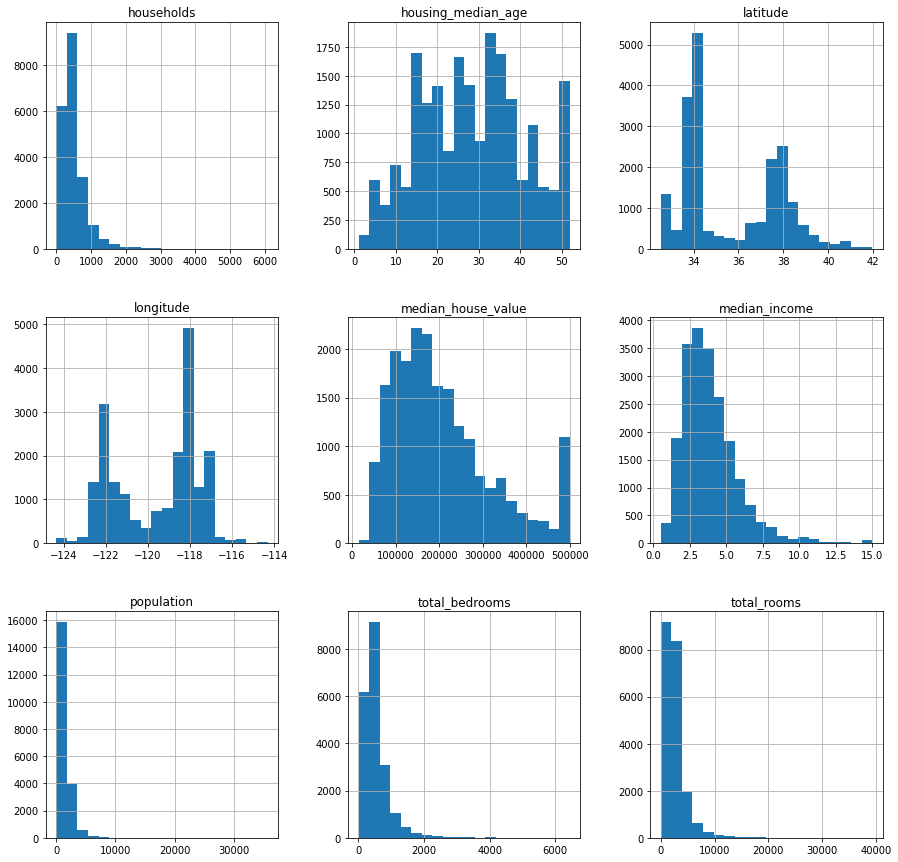

In [7]:
df_file.hist(bins=20, figsize=(15, 15))

# NOTES !!

We can noticed some of the points that related to graphs above like the different scales that the attributes have and for machine learning its better to pass the attributes at some ranges, what we called features scaling.

Also the mendain_income attribute is from .5 to 15 and its ambigous so you need to check this with the owner to know how it going from maybe it means 15,000 or multiply by spesific value.

Also, the price of the house if should go beyond the max and min values or not, and the ranges that have a small number of instances should be removed or not because maybe it causes misleading for the model.

Some of the attributes have skewed right graphs, why?

All of these are questions you can extract from the graphs to ask and trying to find answers.

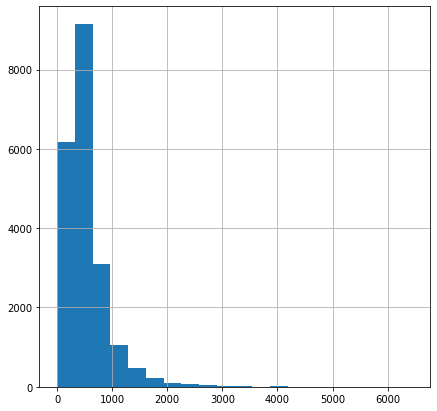

In [8]:
# Call the hist method on just one column
df_file['total_bedrooms'].hist(bins=20, figsize=(7, 7))

# Create a Test Data

This is not easy step or stage, its not actually about split the data, but its about how you ensure that your train and test dataset are included all of the different spectrum of the data which means not bias to some category of the data.


In [9]:
train_set, test_set = split_train_test(df_file, .2)

In [10]:
print(len(train_set))
print(len(test_set))

16512
4128


In [11]:
train_set[:3] # see that first unnamed column have the random indices

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN


# Note !

The problem here is that every time you will run you will have another test and train set which after you train your model with time your model will train overall the data as it with a time its see the test data, but to avoid this either to save your test data in separate file or to make a **seed**, and its will generate the same shuffle indices.

In [12]:
# using sklearn library
train_set, test_set = train_test_split(df_file, test_size=.2, random_state=42)
print(len(train_set))
print(len(test_set))

16512
4128


# Size of the dataset

When the dataset are large enough relative to number of attributes(features), it okay to consider these random method, but if not, you run risk of introducing a signigcant sampling **bias**.

In this case we use the method called ** Stratified Random Sampling **, is a method of sampling that involves the division of a population into smaller sub-groups known as strata, the strata are formed based on members shared attributes or characteristics such as income or educational attainment.

Stratified random sampling is also called proportional random sampling or quota random sampling. 

Stratified random sampling allows researchers to obtain a sample population that best represents the entire population being studied.


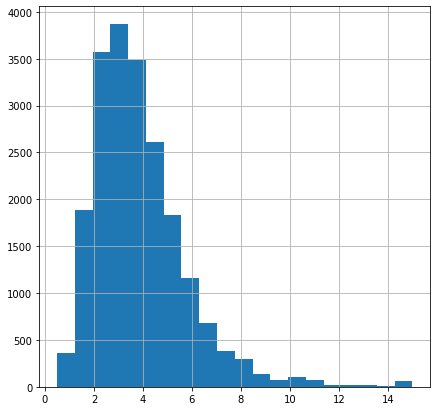

In [13]:
# Call the hist method on just one column
df_file['median_income'].hist(bins=20, figsize=(7, 7))

We can see the problem above in this example, let us imagine that you have split the dataset to train and test randomly using some of straightforward method, as we can see may be your split will take all random instance in the train between 1 to 8 since most of the median income and and test the same was happend except a few example from medain income above 8, but like these problems will be baised since most of your instance are from range 1 to 8, also what happen if it split most of your train in range from 1 to 8 and you find that the test have medain income from 1 to 14, it will misleading your model.

**So its important ot have a sufficient number of instance(rows) in your dataset for each stratum. Or it will cause to bais**

In [14]:
df_file['income_cat'] = pd.cut(df_file['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                              labels=[1, 2, 3, 4, 5])
# df_file['income_cat']

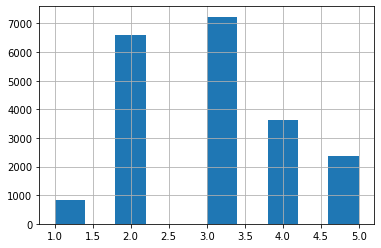

In [15]:
df_file['income_cat'].hist()

Here is we can see that its create a new attribute with 5 categories from 1 to 5 and each category have range like category 1 have range from 0 to 1.5 and category 2 have range from 1.5 to 3.

**Since the median income attribute have its own effect on the price of the house we can make this variable is resposible for our spliting to the dataset instead of the simple methods.**

In [16]:
def measure_income_compare(data):
    class_list = [0, 0, 0, 0, 0]
    for i in data['median_income']:
        if i >= 0 and i < 1.5:
            class_list[0] +=1
        elif i >= 1.5 and i < 3:
            class_list[1] +=1
        elif i >= 3 and i < 4.5:
            class_list[2] +=1
        elif i >= 4.5 and i < 6:
            class_list[3] +=1
        else: class_list[4] +=1
    return class_list

In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.2 , random_state=42)
for train_index, test_index in split.split(df_file, df_file['income_cat']):
    strat_train_set = df_file.loc[train_index] # retrive rows with these indces
    strat_test_set = df_file.loc[test_index] # retrive rows with these indces

In [18]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [19]:
# The number of each category like from 0 to 1.5 about some precentage
stratified = np.array(strat_test_set['income_cat'].value_counts() / len(strat_test_set))
random = np.array(measure_income_compare(test_set))/len(test_set)
overall = np.array(measure_income_compare(df_file))/ len(df_file)

In [20]:
stratified.sort()
random.sort()
overall.sort()
compare_dict = {'overall': overall, 'stratified': stratified, 'random': random}
compare_df = pd.DataFrame(compare_dict)

# In table below we can see how stratified static method most similar to overall coverage of our dataset
# look also at the simple random Vs overall
compare_df['Stratified. %error'] = np.abs((compare_df['stratified'] - compare_df['overall']) * 100)
compare_df['Random. %error'] = np.abs((compare_df['random'] - compare_df['overall']) * 100)
compare_df

,overall,stratified,random,Stratified. %error,Random. %error
0,0.039486,0.039729,0.039971,0.024225,0.048450
1,0.114971,0.114583,0.109496,0.038760,0.547481
2,0.176938,0.176357,0.168605,0.058140,0.833333
3,0.317345,0.318798,0.322674,0.145349,0.532946
4,0.351260,0.350533,0.359254,0.072674,0.799419


In [21]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [22]:
# Now remove income cat to back data to its original form
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


# Discover and Visualize the data to gain insights

With some of the analysis above we get a quick intuation about the dataset, but more to go in depth of understanding the data we dealing with, we need to discover these data more than this quick intuation, and the graphs are the most common to discover the data since our brain is very good spotting patterns in pictures.

First keep your test set aside and make the discover on the training and also take a copy to keep the original training set unchanged, beside of that if the training data is large just look into sample of the data to consider time and memory usage.
## Visualizing Geographic Data

Since there is a geographical information (longtuide and latuide), it's helpful to know about which area have the most house or the density of your data in which are, it may help you to know also why price in some area are greater than the other areas.

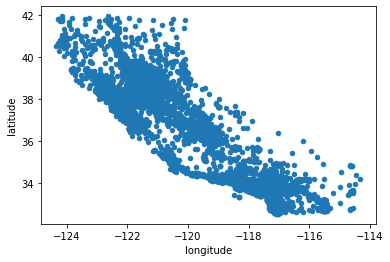

In [23]:
df_file.plot(kind="scatter", x="longitude", y="latitude")

This will give you a littile information,because you have not see any pattern of information.

Then in like these cases the paramters of the graph can help a lot to help you go deeper in discover process.

- What about change the opacity of the circle of scatter plot




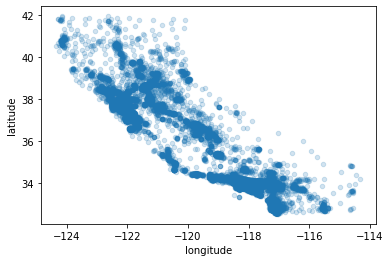

In [24]:
df_file.plot(kind="scatter", x="longitude", y="latitude", alpha=.2)

**It help you to know the density by overlapping the circle if this area have a lot of house there, also other area that have small number of house will be appear because of its opacity will be low.**

- Not just alpha, other parameters of the graph can help you discover more pattern

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pan

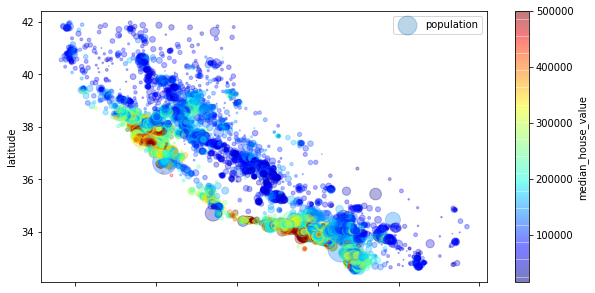

In [25]:
df_file.plot(kind="scatter", x="longitude", y="latitude", alpha=.3,
            s=df_file['population']/50, label="population", figsize=(10,5),
            c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

# Parameters

- s, is the size of the data point, and s=df_file['population']/50, it help us know which area has most density.
- c, is the color that represent the price, which represent range from blue(low price) to red (high price) as we can see in the colorbar.
- cmap, color map which replace the default (black and white) of c, to blue and red.
- colorbar, true to represent the range of color to notice explain the point on the graph.

**From the graph you can now get a clear intuition about how the location affect the price of the house., not just the location also the population density**


# Looking For correlation

As we know our target variables, it's helpful to get the correlation of this target variables against your attributes.

In [26]:
corr_matrix = df_file.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

We can see that median_house_value is so correlated with it self and from this point we should noticed that the values are in range from -1 to 1 and 1 which represent positive higher dpendancy, between that the relationship are close to be or no as in independent variables with 0 correlation or -1 when its strong negative relationship.

Actually the correlation is like the linear equation between x & y, if its 1 then x & y are equal which represent a straight line and for other values it will be different.

**Now maybe we need to get close to median income and graph it against median_house_value as it make the most affect on the price Or we can display scatter_matrix for the most three or four attributes againsit each other**

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f018f78dd30>,
      dtype=object)

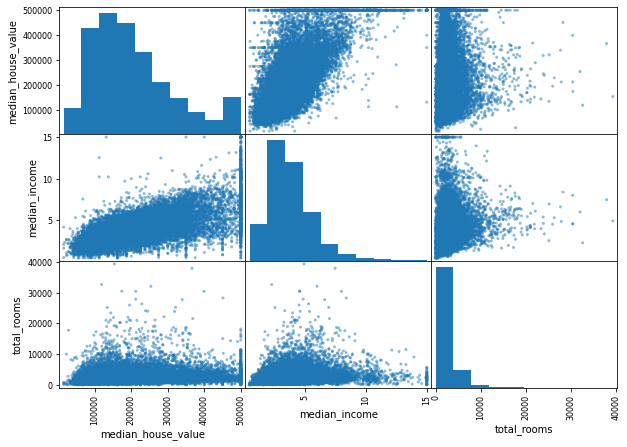

In [27]:
# Scatter_matrix 
pd.plotting.scatter_matrix(df_file[['median_house_value', 'median_income', 'total_rooms']], figsize=(10, 7))

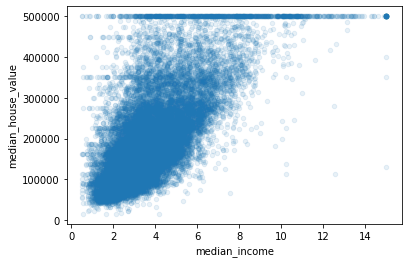

In [28]:
# get close to median house value against median income
df_file.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.1)

# Note !

**This attribute median income have a lot of affect on the price of the house as we can see even with small alpha, not just that, it also can represent some of the horizontal lines at 500,000 and between 3000,00 and 4000, 00, and this may indicate that there is no affect of the median income when in either small or large price the house value is still large, and in this case may be we need to remove like these points from our dataset because it may cause the learning algorithm to overfitting or misleading learning**.

# Attribute Combination

The most helpful thing of machine learning is that it accept the creativity of your solution not just what the data present you should use, no you have the ability to improve the dataset maybe remove some attribute as it has no effect, combine two attributes via math equation, or create new attribute from existing ones.

- median_house_value    1.000000
- median_income         0.688075
- total_rooms           0.134153
- housing_median_age    0.105623
- households            0.065843
- total_bedrooms        0.049686
- population           -0.024650
- longitude            -0.045967
- latitude             -0.144160


We can see here the correlation of the previous stage and if we noticed that the total_rooms can help in finding the number of rooms per house not total room per households, also total_bedrooms and population can help us create a new correlation between attributes.


In [29]:
df_file['rooms_per_household']     = df_file['total_rooms']    / df_file['households']
df_file['bedrooms_per_room']       = df_file['total_bedrooms'] / df_file['total_rooms']
df_file['pupulation_per_ousehold'] = df_file['population'] / df_file['households']

In [30]:
# Now look at the new correlation and find new insights
corr_matrix = df_file.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.688075
rooms_per_household        0.151948
total_rooms                0.134153
housing_median_age         0.105623
households                 0.065843
total_bedrooms             0.049686
pupulation_per_ousehold   -0.023737
population                -0.024650
longitude                 -0.045967
latitude                  -0.144160
bedrooms_per_room         -0.255880
Name: median_house_value, dtype: float64

In [31]:
df_file.head() # look at the dataset now

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,pupulation_per_ousehold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467


# Some new insights

- Bedrooms_per_room decrease with increasing of median_house_value (So strong correlation).
- Rooms_per_household, increase the price of the house by increasing the rooms per house.


# Prepare Data for Machine Learning Algorithm

We doing a pipeline for this process to use with future work or similar data or with the training and testing data or even on the system when we lunch model to work on, we need the new data to feed in this pipeline.

**We will separate the target variables from the other attributes**

In [32]:
# drop median_house_value and save rest of strat_train_set into df_file
df_file = strat_train_set.drop("median_house_value", axis=1) 
df_file_labels = strat_train_set['median_house_value'].copy() 

# Data Cleaning

There are three option to handle missing values(Nan) values:
- Get rid of corresponding rows
- Get rid of the attribute itself
- Replace with meaningful value, in numbers may be median, mode, zero, and other suitable static based on the problem.

In [33]:
# only one attribute has missing values which is total_bedrooms
df_file.dropna(subset=["total_bedrooms"])
df_file.drop("total_bedrooms", axis=1)
median = df_file['total_bedrooms'].median()
df_file['total_bedrooms'].fillna(median, inplace=True)

# Note !

When we use option 3, we should save the median for test dat and other new data when system go live.

Also, we can use the sklearn impute library to handle missing values.

Also, we will rid the one-categorical attribute because the imputer can not deal with text once you pass static median. and we make this process on all the numbers attributes , because maybe in the large dataset which has a lot of attributes it will be difficult to check each attribute or even when the system go life maybe some of attributes can returned without values.

In [34]:
imputer = SimpleImputer(strategy="median")
df_file_num = df_file.drop("ocean_proximity", axis=1)
imputer.fit(df_file_num)
# As we save our median for future sklearn imputer handle this and save it for you in statistics_ attribute 
imputer.statistics_ 

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
# To ensure of these values calculated by sklearn
df_file_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [36]:
X = imputer.transform(df_file_num) # the result is numpy array
df_file_tr = pd.DataFrame(X, columns=df_file_num.columns, index=df_file_num.index)
df_file_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


# Handling Text and Categorical Attributes

After we have looked at the numerical attributes we also need to take a look on the text or categorical attributes, because machine learning models can not deals with text.

In [37]:
df_file_cat = df_file['ocean_proximity']
print(type(df_file_cat))
df_file_cat = df_file[['ocean_proximity']]
print(type(df_file_cat))
df_file_cat.head(10)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


**We can noticed that, it's a categorical attribute not just any text, and its repeated with same case and characters, we can use machine learning OrdinalEncoder class to deal with this categorical attribute.**

In [38]:
ordinal_encoder = OrdinalEncoder()
df_file_cat_encoded = ordinal_encoder.fit_transform(df_file_cat)
print(df_file_cat_encoded[:10])
# _ means learned parameters while **categories** without _ means hyperparameters
print(ordinal_encoder.categories_) 

[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


**In fitting categorical data should we know it's ordinal category or not, because like this case as it not ordicanal the ml may learn pattern from that, and we do not need like this to happen**

The solution in this case is to use binary representation for each category with 1 to such appearing category and 0 for the others, so it will be vector of 4 numbers * the number of the dataset.

**Sklearn also has onehotencoder method to handle this.**

In [39]:
one_hot_encoder = OneHotEncoder()
df_file_cat_1hot = one_hot_encoder.fit_transform(df_file_cat)
df_file_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

# Sparse Matrix

Because the one-hot encoded method give 1 for which category and 0 for others, this will generate a sparse matrix with most of 0, since of that sklearn save only the location of each 1 in the matrix and ignore the zeros, but we can retrieve the whole matrix using **toarray** method associated with the df_file_cat_1hot object.

In [40]:
df_file_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [41]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformer

Everything has an end and the library you use maybe it provide you with a lot of helpful APIs, but sometimes you need to create your transformer, which based on the analysis you made.

And to combine this with sklearn it helpful to apply it in the form that sklearn do, as [fit, transform, fit_transform].

Also you can have other methods or attributes as you need, maybe you have another function of cleaning and you need to make a pipeline for each of stage you have.

Other than that you can combine attributes of hyperparameters for tuning.


In [42]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
df_file_extr_attribs = attr_adder.transform(df_file.values) # as numpy array

# Features Scaling

One of the most interesting and helpful stages is the feature scaling when the dataset attributes go to different ranges like some attribute between [1-100], others [1000, 10000000], and others are different,  in this case of numerical ranges of different attributes, it's helpful to standardize all the numeric attributes to specific range always [0-1], which applied by the Max-Min function, which divides each value by max minus min which will restrict all values to be between 0 and 1, other function is using standard deviation and mean, but its goes to the different distribution of ranges. 

This is help machine learning to perform well in this case of **Features Scaling**, also some times when the model in learning if we do not apply **Features Scaling** and values of some attributes are large, this can cause explode of values in the iteration when the model trying to minimize the cost function.


# Transformation Pipelines

As we can see, we have passed through different data transformation stages, because of that we should care of the order these transformer are applied to the data, So we can use the idea of **PipeLine** either create your own transformer function or use sklearn pipeline.


In [43]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_addder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
df_file_num_tr = num_pipeline.fit_transform(df_file_num)
df_file_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

# PipeLine

The pipeline constructor of sklearn takes a list of tuples each of these tables are pairs of **name/estimator**, the Last table should contain transformer estimator.

When we cal the fit() method of Pipeline object, it calls fit_transform() **fit_transform() of object in the pipeline** methods sequentially on all transformers, then it pass the result output of each call to next call until the end of pipeline

# Numerical & Categorical Attributes

We also need to make our pipeline to handle the two different types of data Numerical and Categorical, so we designed another pipeline that works with all columns (attributes).

Also, sklearn has **ColumnTransformer** that we can feed the full pipeline to and it works fine with pandas data frames.

In [44]:
num_attribs = list(df_file_num)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [45]:
cat_attribs = ["ocean_proximity"]
df_file.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [46]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])
df_file_prepared = full_pipeline.fit_transform(df_file)

# Select and Train a Model

Now we are ready to select and train the Machine Learning Model, after all these previous steps, now the rest is simple than what we have before.

Just we can import and use linear regression model, lets do it.


In [47]:
df_file_prepared.shape

(16512, 16)

In [48]:
df_file.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [49]:
lin_reg = LinearRegression()
lin_reg.fit(df_file_prepared, df_file_labels)

LinearRegression()

In [50]:
# Now its done we fit the model we can test some prediction and see the score
some_data = df_file.iloc[:5]
some_labels = df_file_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Prediction: ", lin_reg.predict(some_data_prepared))
print("Real Lables: ", list(some_labels))

Prediction:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Real Lables:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [51]:
# Now lets do it on the whole dataset
df_file_predictions = lin_reg.predict(df_file_prepared)
lin_mse = mean_squared_error(df_file_predictions, df_file_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

# Underfitting
As we can see how its bad prediction since of this large error, and as we talked in chapter 1 its underfitting problem, which the model have not fit the data well, and this may back to number of things:

- The Model is so simple to get pattern from the data, or to fit the data as it linear equation.
- The dataset itself may contain insufficient attributes to let the model learn from.
- insufficient quantity of the training data.
- Regularization part if we have.
- irrelevant features(attributes), which can mean that features does not provide the model with enough information to make a good prediction.


# DecisionTreeRegressor

Now we are going to use more complex model which can find a nonlinear relationship in the data.

In [52]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_file_prepared, df_file_labels)
df_file_predictions = tree_reg.predict(df_file_prepared)
tree_mse = mean_squared_error(df_file_predictions, df_file_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Overfitting

As we also talked about earlier in the previous chapter the model may be overfitting your training data, and for that, we kept aside part of the data which the test set to test our model on unseen examples, and see how it works,the model has no error on the training data, but what if we have predicted the test data.

But as we also know it's helpful to cut part of training data as it called (dev-set) for validating the model, because we should use the test data when we are ready to launch the model to be confident of this model.



# Better Evaluation Using Cross-Validation

We can use sklearn train_test_split function to split the training set into train and validation sets, then train model on this training set and evaluate it on validation set.

But a better way is to use K-Cross-Validation method, which help you to train and validate your model on the whole training set, since it devide your training set into K flods, use one of them to evalute as validation set and K-1 to train on, next iteration use another flod and repeat the process to end of K-foods which have trained and evaluated on.


In [53]:
scores = cross_val_score(tree_reg, df_file_prepared, df_file_labels, cv=10,
                        scoring="neg_mean_squared_error")
tree_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ",scores.std())
    return True

In [55]:
display_scores(tree_rmse_scores)

Scores:  [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean:  70666.74616904806
Standard deviation:  2928.322738055112


True

# Note !
**As we can see that the tree model is same as linear regression even of it fit well on the training data it cause overfitting problem and have fall on the validation set**

In [56]:
lin_scores = cross_val_score(lin_reg, df_file_prepared, df_file_labels, cv=10,
                            scoring='neg_mean_squared_error')
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.674001798348


True

# RandomForestRegressor

Another model can help us to ensure that the underfitting problem is away of simpler or complex usage models, it can be one of the other problems that underfitting problems happen because of it.

**Instead of using just one Decision tree the  RandomForestRegressor trying many Decision trees on random subset of the features (attributes), then averaging out their prediction**

# Note !
Like this models **RandomForestRegressor** called **Ensemble** since it building a model on top of many other models which can push machine learning algorithm to go further than expect.

In [57]:
forest_reg = RandomForestRegressor()
forest_reg.fit(df_file_prepared, df_file_labels)

RandomForestRegressor()

In [58]:
df_file_predictions = forest_reg.predict(df_file_prepared)
forest_mse = mean_squared_error(df_file_predictions, df_file_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18680.294240259147

In [59]:
forest_scores = cross_val_score(forest_reg, df_file_prepared, df_file_labels, cv=10,
                            scoring='neg_mean_squared_error')
forest_reg_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_reg_rmse_scores)

Scores:  [49557.6095063  47584.54435547 49605.349788   52325.13724488
 49586.9889247  53154.87424699 48800.48987508 47880.32844243
 52958.68645964 50046.17489414]
Mean:  50150.018373763225
Standard deviation:  1902.0697041387534


True

# Note !

The score now looks better than other models, but we still have the overfitting problem as we can see how it fit well on the training, and fill in evaluation on the validation set.

We can work with overfitting problems via:

- If We can get more training data.
- We can provide the model with suitable regularization.
- Look at the number of attributes against number of training examples, if they are close we can rid of some attributes.
- Reduce the noise of the data.
- Try simpler models.

# Fine-Tune Models

This stage comes late because after we have run our pipeline, then trying different models, we have to choose which best of them even if there is more than one model, you next need to **fine-tune** the parameters of the model to make it doing best as you can, after this step of cross-validation that we have and since we choose the model, now we are in the last stage which with the chosen model we are trying to fine-tune these models with best parameters that make the model fit well then we can test our chosen model on the test set.


# Grid Search

Because each model associated with a not small number of hyperparameters which you need to tune the model using these parameters, is not a handy way to make it your self manually as a lot of time you should consider in all of the combinations of these hyperparameters.
So an alternative  solution is to use the best way **Grid Search**.

With **Grid Search** all just you need is to feed what hyperparameters you need to use and for each of them what the different values you need to feed the model with and the **Grid Search** will make all the combinations for you and provide you at the end with the best hyperparameters values.


In [60]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # combination one
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # combination Two
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(df_file_prepared, df_file_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [61]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [62]:
grid_search.refit

True

In [63]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63433.40391736115 {'max_features': 2, 'n_estimators': 3}
56049.06443637957 {'max_features': 2, 'n_estimators': 10}
52824.848527310685 {'max_features': 2, 'n_estimators': 30}
60924.41328448018 {'max_features': 4, 'n_estimators': 3}
52713.650694157855 {'max_features': 4, 'n_estimators': 10}
50660.92190603788 {'max_features': 4, 'n_estimators': 30}
59604.01184459288 {'max_features': 6, 'n_estimators': 3}
52347.604952708156 {'max_features': 6, 'n_estimators': 10}
49923.3473574243 {'max_features': 6, 'n_estimators': 30}
59308.345962472304 {'max_features': 8, 'n_estimators': 3}
52320.77872780119 {'max_features': 8, 'n_estimators': 10}
50080.73594153239 {'max_features': 8, 'n_estimators': 30}
62160.41351492645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54391.4645181866 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60269.48857946438 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52791.4337224519 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

# Radomized Search

The grid search approach is fine but with few relative combination of hyperparameters, but when it seems to have multiple or large number of hyperparameters, and it work in same way of **Grid Search**, but instead of trying all combinations, it randomize these hyperparameters and choose some of them for each iteration.

It help you in:
- Randmoize maybe for 1000 different value for each hyperparamter, instead of few predefind.
- This work depends on your situation of sources that you have, because it takes time computing and other consumed budget, it let you to iterate the number you need.

# Ensemble Methods

Instead of test each model individually, this method combine some of the model that you see can help you them combine them together to see how they work.

# Analyze the best Models and their errors

By all of these trials you have consider which best model that you will use on the test set, and the best model you choose can indicate which attributes of the data indicate to the best accurate result.

All we need is to list best_estimator_ with their corresponding attributes.


# Evaluate Your Models on Test set

After all of these steps from pipeline on the data, to tune the model paramters and trying different models for best result, should we have choose best of these models and now its work for test the models on testset.

After looking at these values associated with each attributes, you can decide which of them will be helpful, and you can drop some of less useful of these attributes.

You should look at your system and try to understand which makes these error, and how you can solve like these errors.

In [64]:
features_importances = grid_search.best_estimator_.feature_importances_
features_importances

array([7.55720671e-02, 6.39878625e-02, 4.24072059e-02, 1.82928273e-02,
       1.68924417e-02, 1.75601900e-02, 1.66881781e-02, 3.03268232e-01,
       6.31565549e-02, 1.08958622e-01, 8.44196144e-02, 8.53515062e-03,
       1.73063945e-01, 8.08024120e-05, 2.96250425e-03, 4.15380176e-03])

In [65]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(features_importances, attributes), reverse=True)

[(0.303268232301214, 'median_income'),
 (0.1730639450304893, 'INLAND'),
 (0.10895862174634888, 'pop_per_hhold'),
 (0.0844196144263057, 'bedrooms_per_room'),
 (0.07557206707255014, 'longitude'),
 (0.06398786252477989, 'latitude'),
 (0.06315655490931624, 'rooms_per_hhold'),
 (0.04240720593117474, 'housing_median_age'),
 (0.01829282732311651, 'total_rooms'),
 (0.017560189966804522, 'population'),
 (0.01689244166020893, 'total_bedrooms'),
 (0.01668817806453196, 'households'),
 (0.008535150622100876, '<1H OCEAN'),
 (0.0041538017589390725, 'NEAR OCEAN'),
 (0.0029625042500806965, 'NEAR BAY'),
 (8.080241203860085e-05, 'ISLAND')]

In [66]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(final_predictions, y_test)
final_rmse = np.sqrt(final_mse)
final_rmse

48760.26530172545

# Exercises


#### Q1-

Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [67]:
param_grid = [
    {'kernel': ["linear", "rbf"], 'C': [0.01, .1, 1], 'gamma': ['scale', 'auto']}, # combination one
]

svr_model = SVR()
grid_search = GridSearchCV(svr_model, param_grid, cv=3, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(df_file_prepared, df_file_labels)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

118875.19177504184 {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
118932.63158442525 {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
118875.19177504184 {'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
118932.65123064468 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
118360.8388369683 {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
118911.20214880619 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
118360.8388369683 {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
118911.39813118486 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
113570.79729869253 {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
118700.33783086088 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
113570.79729869253 {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
118703.26770375816 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


# Q2

Try replacing GridSearchCV with RandomizedSearchCV.

In [69]:
param_grid = [
    {'kernel': ["linear", "rbf", "sigmoid"], 'C': [0.01, .1, 1, 3, 5], 'gamma': ['scale', 'auto']}, # combination one
]

svr_model = SVR()
random_search = RandomizedSearchCV(svr_model, param_grid, n_iter=10, cv=5, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)
random_search.fit(df_file_prepared, df_file_labels)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions=[{'C': [0.01, 0.1, 1, 3, 5],
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['linear', 'rbf',
                                                    'sigmoid']}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

118424.90332842329 {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 1}
118063.84006197598 {'kernel': 'rbf', 'gamma': 'scale', 'C': 3}
118631.71004256308 {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
118881.84948534759 {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 0.1}
118917.99798254616 {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0.01}
118919.12934300481 {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 0.01}
117770.88236726078 {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 3}
95066.89952171071 {'kernel': 'linear', 'gamma': 'scale', 'C': 5}
118920.09701453955 {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.01}
118892.47248281227 {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}


In [71]:
param_grid = [
    {'kernel': ["linear"], 'C': np.linspace(5, 1000, 20), 'gamma': ['scale']}, # combination one
]

svr_model = SVR()
random_search = RandomizedSearchCV(svr_model, param_grid, n_iter=20, cv=3, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)
random_search.fit(df_file_prepared, df_file_labels)

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=20,
                   param_distributions=[{'C': array([   5.        ,   57.36842105,  109.73684211,  162.10526316,
        214.47368421,  266.84210526,  319.21052632,  371.57894737,
        423.94736842,  476.31578947,  528.68421053,  581.05263158,
        633.42105263,  685.78947368,  738.15789474,  790.52631579,
        842.89473684,  895.26315789,  947.63157895, 1000.        ]),
                                         'gamma': ['scale'],
                                         'kernel': ['linear']}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

97802.26888852005 {'kernel': 'linear', 'gamma': 'scale', 'C': 5.0}
73409.59190780546 {'kernel': 'linear', 'gamma': 'scale', 'C': 57.36842105263158}
71753.95072042834 {'kernel': 'linear', 'gamma': 'scale', 'C': 109.73684210526316}
71234.78613537567 {'kernel': 'linear', 'gamma': 'scale', 'C': 162.10526315789474}
70971.32307165234 {'kernel': 'linear', 'gamma': 'scale', 'C': 214.47368421052633}
70822.57547500903 {'kernel': 'linear', 'gamma': 'scale', 'C': 266.8421052631579}
70720.480170532 {'kernel': 'linear', 'gamma': 'scale', 'C': 319.2105263157895}
70645.01345727345 {'kernel': 'linear', 'gamma': 'scale', 'C': 371.5789473684211}
70599.60433272706 {'kernel': 'linear', 'gamma': 'scale', 'C': 423.94736842105266}
70565.0254179171 {'kernel': 'linear', 'gamma': 'scale', 'C': 476.3157894736842}
70537.38672163438 {'kernel': 'linear', 'gamma': 'scale', 'C': 528.6842105263158}
70506.09824933499 {'kernel': 'linear', 'gamma': 'scale', 'C': 581.0526315789474}
70488.6681753618 {'kernel': 'linear', 'ga

In [73]:
np.sqrt(-random_search.best_score_)

70448.57591643732

In [74]:
random_search.best_estimator_

SVR(C=842.8947368421053, kernel='linear')

In [75]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # combination one
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(df_file_prepared, df_file_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
features_importances = grid_search.best_estimator_.feature_importances_
features_importances

array([7.75595789e-02, 6.83150050e-02, 4.37783994e-02, 1.77868250e-02,
       1.68845816e-02, 1.87354362e-02, 1.69934215e-02, 3.33328905e-01,
       5.91595412e-02, 1.06522288e-01, 8.14759697e-02, 1.72822177e-02,
       1.26867654e-01, 8.02249678e-05, 5.41989863e-03, 9.81005266e-03])

In [77]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', SelectTopFeatures(features_importances, 5))
])

housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(df_file)
housing_prepared_top_k_features.shape

(16512, 5)

# Q-4

Try creating a single pipeline that does the full data preparation plus the final prediction.

In [94]:
random_search.best_params_

{'C': 842.8947368421053, 'gamma': 'scale', 'kernel': 'linear'}

In [100]:
preparation_and_feature_selection__pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_select', SelectTopFeatures(features_importances, 5)),
    ('svr_reg', SVR(kernel="linear", C=842.9, gamma="scale")),
])

housing_prepared_top_k_features = preparation_and_feature_selection__pipeline.fit(df_file, df_file_labels)

In [104]:
# Now its done we fit the model we can test some prediction and see the score
some_data = df_file.iloc[:5]
some_labels = df_file_labels.iloc[:5]
print("Prediction: ", housing_prepared_top_k_features.predict(some_data))
print("Real Lables: ", list(some_labels))

Prediction:  [175783.16889974 317445.03739922 170487.90150178  56837.40003829
 177512.17225531]
Real Lables:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


# **As we can see one pipeline is handle all of our stages.**

# Q-5

Automatically explore some preparation options using GridSearchCV.

## Try to solve

#                                    الحمدلله تم بفضل الله وكرمة 